In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [36]:
df=pd.read_csv('train_ctrUa4K.csv')

In [37]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [38]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [39]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Handling Missing values

In [40]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

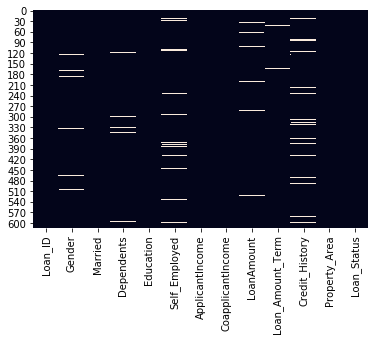

In [41]:
sns.heatmap(df.isnull(), cbar=False)

In [42]:
print('Dependents      :-',df['Dependents'].unique())
print('Self-Employed   :-',df['Self_Employed'].unique())
print('Credit history  :-',df['Credit_History'].unique())
print('Loan_Amount_Term:-',df['Loan_Amount_Term'].unique())

Dependents      :- ['0' '1' '2' '3+' nan]
Self-Employed   :- ['No' 'Yes' nan]
Credit history  :- [ 1.  0. nan]
Loan_Amount_Term:- [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]


In [43]:
df['Dependents'] = df['Dependents'].replace(np.nan, '0')
df['Self_Employed'] = df['Self_Employed'].replace(np.nan, 'No')
df['Self_Employed'] = df['Self_Employed'].replace(np.nan,0.)

In [44]:
print('Credit history:-',df['Credit_History'].unique())

Credit history:- [ 1.  0. nan]


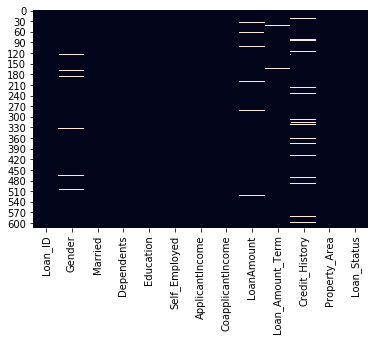

In [45]:
sns.heatmap(df.isnull(), cbar=False)

# Loan amount term

In [46]:
print('Loan_Amount_Term unique values:-',df['Loan_Amount_Term'].nunique())
print('Loan_Amount_Term:-',df['Loan_Amount_Term'].unique())

Loan_Amount_Term unique values:- 10
Loan_Amount_Term:- [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]


* These can be treated as categorical variable.

In [47]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('category')

In [48]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

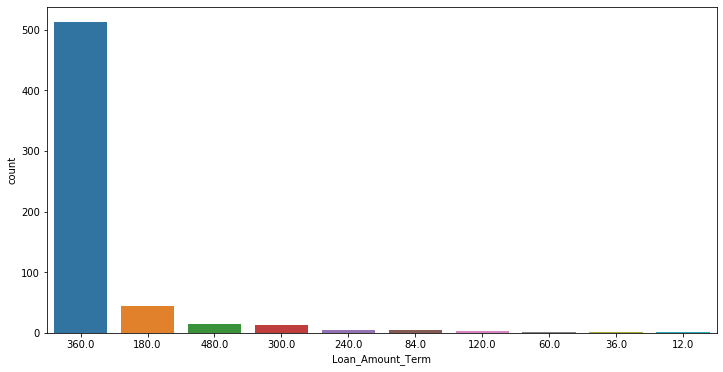

In [49]:
fig, ax1= plt.subplots(figsize=(12,6))
sns.countplot(df['Loan_Amount_Term'],order=df['Loan_Amount_Term'].value_counts().index)  
#value_counts().index to arrange in decending order

Filling NA with 360 which is mode of that column

In [59]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

# gender

In [60]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

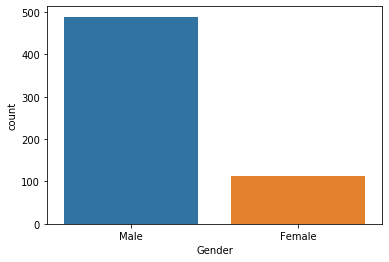

In [62]:
sns.countplot(df['Gender'])

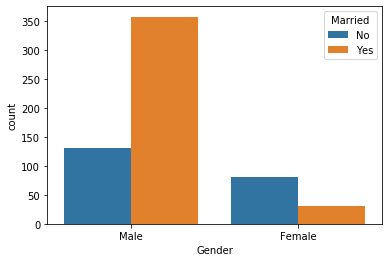

In [63]:
sns.countplot(df['Gender'],hue=df['Married'])

from the data we can see that more number of non married female are applying for the loan as compared to married female